# Assignment 5: 311 Database

**Due:** 4 December by 11:59:59PM

These data were scraped from the 311 Service Request data available from the [New York City Open Data site](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). The data are presented to you in four arrays each with **N** rows representing service requests over a period of about 4 weeks of full days.
 
**Times:** N by 3 integer array of the _Day_ (counting from 0), _Hour_ (0 to 23), and _Day of the Week_ (Monday is 0) the request was created.
 
**Requests:** N by 2 string array of the _Complaint_ and the _Descriptor_ for the request.
 
**Locations:** N by 2 string array of the _City_ and _[Borough](https://en.wikipedia.org/wiki/Borough)_ for the request.
 
**Coordinates:** N by 2 float array of the _X_ and _Y_ coordinates of the request in the [State Plane Coordinate system](https://en.wikipedia.org/wiki/State_Plane_Coordinate_System). You won't need to know anything about the coordinate system, just that they are two orthogonal coordinates in the plane. 
 
Think of the 4 arrays as representing one large table with the **N** rows and 9 columns. 

In [1]:
Author = 'jcaldous' # not your pid, your onyen
Collaborators = []

## Set up

I will set up the environment for you here. Do not modify any of this.

In [1]:
%matplotlib inline
import numpy as np
import pylab
import comp116

check, report = comp116.start('A5')

# I'll load the data for you and make it unwriteable to protect you. 
# Don't change this!
with np.load('311.npz') as data:
    Times = data['Times']
    Times.flags.writeable = False
    Requests = data['Requests']
    Requests.flags.writeable = False
    Locations = data['Locations']
    Locations.flags.writeable = False
    Coordinates = data['Coordinates']
    Coordinates.flags.writeable = False

## 1. How many requests do we have?

I'm looking for **N** as in the description above.

In [2]:
#Write your code here
A1=len(Requests)

print('Number of requests =', A1)

check('A1', A1, points=4)

Number of requests = 14204
A1 appears correct



## 2. What was the average number of requests per hour?

In [3]:
#Write your code here
A2 = len(Requests)/(np.max(Times[:,0]+1)*24)

print('Requests/hour =', A2)
check('A2', A2, points=4)

Requests/hour = 22.7628205128
A2 appears correct


## 3. Which cities are in the data?

I want an alphabetized list of the different values in the city column of the locations. Each city name should be in the list only once.

In [4]:
r=Locations[:,0]
w=np.unique(r)
x=tuple(w)

In [5]:
#Write your code here
r=Locations[:,0]
b=(np.unique(r))

A3 = b.tolist()

print('Cities =', A3)
check('A3', A3, points=4)

Cities = ['Arverne', 'Astoria', 'Bayside', 'Bellerose', 'Bronx', 'Brooklyn', 'Cambria Heights', 'Central Park', 'College Point', 'Corona', 'East Elmhurst', 'Elmhurst', 'Far Rockaway', 'Floral Park', 'Flushing', 'Forest Hills', 'Fresh Meadows', 'Glen Oaks', 'Hollis', 'Howard Beach', 'Jackson Heights', 'Jamaica', 'Kew Gardens', 'Little Neck', 'Long Island City', 'Maspeth', 'Middle Village', 'New Hyde Park', 'New York', 'Oakland Gardens', 'Ozone Park', 'Queens', 'Queens Village', 'Rego Park', 'Richmond Hill', 'Ridgewood', 'Rockaway Park', 'Rosedale', 'Saint Albans', 'South Ozone Park', 'South Richmond Hill', 'Springfield Gardens', 'Staten Island', 'Sunnyside', 'Whitestone', 'Woodhaven', 'Woodside']
A3 appears correct


## 4. Which complaints happened every day?

Your result should be an alphabetical list of complaints that occur every day in the data. In other words, if there is even a single day without a particular complaint, that complaint should not be in your list. Each complaint should only be in the list once.

In [6]:
#how to make this a loop
Day1= set()
for i in range(len(Requests)):
    if Times[i,0]==0:
        Day1.add(Requests[i,0])
Day2= set()
for i in range(len(Requests)):
    if Times[i,0]==1:
        Day2.add(Requests[i,0])
Day3= set()
for i in range(len(Requests)):
    if Times[i,0]==2:
        Day3.add(Requests[i,0])
Day1&Day2&Day3

{'Animal Abuse',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Drinking',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Traffic',
 'Vending'}

In [9]:
np.max(Times[:,0])
L=[]
for n in range(0,np.max(Times[:,0])+1):
    Day=set()
    for i in range(len(Times)):
        if Times[i,0]==n:
            Day.add(Requests[i,0])
    L.append(Day)
A=L[0]
for n in range(0,len(L)-1):
    A=A&L[n+1]
mostcomplaints=list(sorted(A))

In [8]:
#sets that happen every day--use dice model with sets instead of intergers
#complaints that happen in those days
#and them

In [10]:
#Write your code here

A4 = list(sorted(A)) #expecting a list of strings


print('Complaints that happened every day', A4)
check('A4', A4, points=8)

Complaints that happened every day ['Blocked Driveway', 'Derelict Vehicle', 'Illegal Parking', 'Noise - Commercial', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Traffic', 'Vending']
A4 appears correct


## 5. Which time had the most requests?

Your result should be a two-element array of the day and hour of the time that had the most requests.

In [11]:
def countlastconsecutivedigitdictionary(Time):
    result={}
    for i in range(len(Time)):
        d1=Time[i,0]
        d2=Time[i,1]
        key=(d1,d2)
        result[key]=result.get(key,0)+1
    return result
count=countlastconsecutivedigitdictionary(Times)

max(count, key=count.get)

## how to find max value in dictionary

(13, 23)

In [12]:
#Write your code here
def mostcomplaints(Time):
    result={}
    for i in range(len(Time)):
        d1=Time[i,0]
        d2=Time[i,1]
        key=(d1,d2)
        result[key]=result.get(key,0)+1
    return result
count=countlastconsecutivedigitdictionary(Times)
max(count, key=count.get)
##how to make it an array
A5 = np.array(max(count, key=count.get))

print('Most requests [Day Hour] =', A5)
check('A5', A5, points=8)

Most requests [Day Hour] = [13 23]
A5 appears correct


## 6. Where are the parties?

Which city has the most requests with descriptor 'Loud Music/Party'?

In [13]:
Descriptor = 'Loud Music/Party'
Requests[:,1]=='Loud Music/Party'

array([False,  True,  True, ..., False,  True, False], dtype=bool)

In [14]:
w=np.unique(Locations[Requests[:,1]==Descriptor][:,0], return_counts=True)
np.argmax(w)
Locations[np.argmax(w),0]

'Astoria'

In [15]:
def parties(s):
    r={}
    for i in range(len(s)):
        si=s[i]
        if si not in r:
            r[si]=0
        r[si]=r[si] +1
    return r
w=parties(Locations[Requests[:,1]==Descriptor][:,0])
A6 = max(w,key=w.get)


print('Party city =', A6)
check('A6', A6, points=8)

Party city = New York
A6 appears correct


## 7. Where are they drinking in the Bronx?

Plot points at the coordinates of the requests with borough 'Bronx' and complaint 'Drinking'.

Do **not** augment the plot in any way. No titles, etc. 

In [16]:
Borough = 'Bronx'
Complaint = 'Drinking'
Bronx=Locations[:,1]==Borough
Drinking=Requests[:,0]== Complaint

A7 appears correct


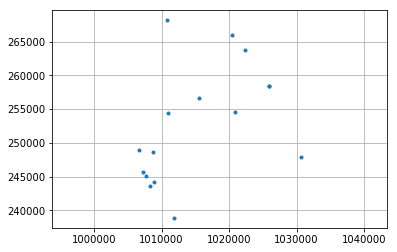

In [17]:
Borough = 'Bronx'
Complaint = 'Drinking'
#Write your code here
def both(lists,array,Coordinate):
    empty=[]
    for i in range(len(array)):
        if lists[i]== True & array[i]==True:
            empty.append(Coordinate[i])
    return empty
bars=np.array(both(Bronx,Drinking,Coordinates))
xcoord=bars[:,0]
ycoord=bars[:,1]
pylab.plot(xcoord,ycoord,'.')
#These lines format the graph to make it look nicer, no need to change them
pylab.axes().set_aspect('equal', 'datalim')
pylab.grid()

check('A7', pylab.gcf(), points=8)

## 8. Where is the most blocked driveway?

I want the coordinate that has the most requests with complaint 'Blocked Driveway'? I'm expecting a two-element float array with the X/Y coordinate of the driveway with the most complaints.

In [18]:
Complaint = 'Blocked Driveway'

Requests[:,0]==Complaint
w=Coordinates[Requests[:,0]==Complaint]
Complaint = 'Blocked Driveway'
np.unique(Coordinates[Requests[:,0]==Complaint][:,:], return_counts=True)

(array([  123229.,   124311.,   126042., ...,  1064732.,  1065593.,
         1065892.]), array([1, 1, 1, ..., 1, 1, 1]))

In [19]:
def driveways(Coordinate):
    result={}
    for i in range(len(Coordinate)):
        d1=Coordinate[i,0]
        d2=Coordinate[i,1]
        key=(d1,d2)
        result[key]=result.get(key,0)+1
    return result
count=driveways(w)
f=max(count, key=count.get)
np.array(f)

array([ 1002442.,   218986.])

In [20]:
def driveways(Coordinate):
    result={}
    for i in range(len(Coordinate)):
        d1=Coordinate[i,0]
        d2=Coordinate[i,1]
        key=(d1,d2)
        result[key]=result.get(key,0)+1
    return result
count=driveways(w)
mostblocked=max(count, key=count.get)
# Write your code here
A8 = np.array(mostblocked)

print('Most blocked coordinate =', A8)
check('A8', A8, points=8)

Most blocked coordinate = [ 1002442.   218986.]
A8 appears correct


## 9. How long can I sleep?

What is the length the longest run of hours with no requests having the string 'Noise' anywhere in the complaint?

In [21]:
def timesandrequest(Time,Request):
    result={}
    for i in range(len(Time)):
        d1=Time[i,0]
        d2=Time[i,1]
        key=(d1,d2)
        result[key]=Request[i,0]
    return result
count=timesandrequest(Times,Requests)
count

{(0, 0): 'Noise - Street/Sidewalk',
 (0, 1): 'Noise - Street/Sidewalk',
 (0, 2): 'Noise - Street/Sidewalk',
 (0, 3): 'Illegal Parking',
 (0, 4): 'Noise - Commercial',
 (0, 5): 'Noise - Vehicle',
 (0, 6): 'Derelict Vehicle',
 (0, 7): 'Blocked Driveway',
 (0, 8): 'Traffic',
 (0, 9): 'Derelict Vehicle',
 (0, 10): 'Illegal Parking',
 (0, 11): 'Blocked Driveway',
 (0, 12): 'Noise - Park',
 (0, 13): 'Traffic',
 (0, 14): 'Blocked Driveway',
 (0, 15): 'Illegal Parking',
 (0, 16): 'Noise - Street/Sidewalk',
 (0, 17): 'Noise - Street/Sidewalk',
 (0, 18): 'Noise - Street/Sidewalk',
 (0, 19): 'Noise - Street/Sidewalk',
 (0, 20): 'Illegal Parking',
 (0, 21): 'Noise - Commercial',
 (0, 22): 'Blocked Driveway',
 (0, 23): 'Noise - Street/Sidewalk',
 (1, 0): 'Noise - Commercial',
 (1, 1): 'Noise - Commercial',
 (1, 2): 'Noise - Commercial',
 (1, 3): 'Noise - Commercial',
 (1, 4): 'Noise - Street/Sidewalk',
 (1, 5): 'Derelict Vehicle',
 (1, 6): 'Noise - Street/Sidewalk',
 (1, 7): 'Blocked Driveway',
 (1

In [22]:
Word = 'Noise'
consecutivehours=Times[:,0]*24+Times[:,1]
consecutivehours

array([  0,   0,   0, ..., 623, 623, 623])

In [23]:
r=[]
for i in range(len(Requests)):
    r.append(Word in Requests[i,0])
Nonoise=np.array(r)
Nonoise[10:20]

array([ True,  True,  True, False,  True,  True,  True,  True, False,  True], dtype=bool)

In [24]:
A=consecutivehours[Nonoise]
len(A)

5198

In [25]:
#np.bincount
Bincount=np.bincount(consecutivehours[Nonoise])
Bincount

array([33, 45, 23,  8, 10,  4,  2,  3,  3,  9,  3, 12,  9, 18, 14, 22, 19,
       15, 13, 14, 17, 17, 43, 55, 59, 53, 22, 21,  9,  6,  1,  0,  1,  6,
        4,  8,  9, 15, 22, 11,  5,  7, 12,  7, 11, 12, 15, 18, 14, 17,  9,
        3,  4,  0,  3,  4,  3,  4,  2,  3,  1,  3,  0,  3,  4,  3,  5,  9,
        7, 10, 14, 17, 13,  8,  5,  1,  0,  1,  0,  3,  3,  6,  5,  1,  5,
        3,  3,  2,  3,  5,  5,  6,  5, 16, 17, 16, 17, 16,  6,  2,  2,  1,
        3,  1,  5,  2,  6,  5,  2,  1,  3,  7,  4,  5,  4,  6,  7, 10, 14,
       14, 13, 19,  6,  1,  5,  3,  2,  0,  4,  2,  0,  1,  0,  3,  1,  3,
        2,  5,  8,  6,  3, 16, 25, 29, 24, 24,  7,  3,  3,  1,  3,  0,  1,
        2,  1,  3,  4,  3,  1,  2,  0,  0,  3,  0,  0,  0,  0,  5,  1,  2,
        0,  1,  0,  0,  0,  0,  0,  0,  1,  2,  0,  0,  0,  3,  5,  6,  5,
       10, 12, 17, 28, 38, 44, 40, 26, 11, 14,  7,  6,  3,  1,  3,  4,  5,
        4,  9,  9,  8, 10, 17, 18, 16, 10,  9, 28, 20, 21, 10,  9,  8,  4,
        0,  3,  1,  3,  4

In [26]:
Word = 'Noise' # anywhere in the Complaint
def MaxRunLength(P):
    result = 0
    N = 0
    for k in range(len(P)):
        if P[k]==0:
            N = N+1
        else:
            N = 0
        if N > result:
            result = N
    return result
silent=MaxRunLength(Bincount)
# Write your code here
A9 = silent

print('Longest run of quiet hours =', A9)
check('A9', A9, points=12)

Longest run of quiet hours = 6
A9 appears correct


## 10. What was the average number of parties for each day of the week?

I want an array with 7 entries giving the average number of requests with descriptor 'Loud Music/Party' for each day of the week (Monday through Sunday). 

Note that the number of days **may not** be a multiple of 7 which means the divisor for each day of the week may be different. For example, there may be 4 Saturdays but only 3 Thursdays. You can't simply add up the number of requests for each day of the week. You'll need to compute the divisor for each day of the week because the dataset I use for grading may be different.

In [27]:
d=Requests=='Loud Music/Party'
np.count_nonzero([d])
##not nested two different

3001

In [28]:
np.unique(Times[Times[:,2]==3][:,0])

array([ 5, 12, 19])

In [29]:
requestperday=[]
for n in range(0,7):
    d=Requests[Times[:,2]==n]=='Loud Music/Party'
    requestperday.append(np.count_nonzero(d))
requestperday
dayofweek=[]
for n in range(0,7):
    e=np.unique(Times[Times[:,2]==n][:,0])
    dayofweek.append(len(e))
dayofweek
party=[]
for n in range(0,7):
    party.append(requestperday[n]/dayofweek[n])
requestperday, dayofweek, party

([280, 234, 325, 252, 270, 810, 830],
 [4, 4, 4, 3, 3, 4, 4],
 [70.0, 58.5, 81.25, 84.0, 90.0, 202.5, 207.5])

In [30]:
Descriptor = 'Loud Music/Party'
#need to find tuesdays (use set or np.unique)
# Write your code here
requestperday=[]
for n in range(0,7):
    d=Requests[Times[:,2]==n]=='Loud Music/Party'
    requestperday.append(np.count_nonzero(d))
requestperday
dayofweek=[]
for n in range(0,7):
    e=np.unique(Times[Times[:,2]==n][:,0])
    dayofweek.append(len(e))
dayofweek
party=[]
for n in range(0,7):
    party.append(requestperday[n]/dayofweek[n])
requestperday, dayofweek, party
    
A10 = np.array(party)


print('Average parties each day of the week =', A10)
check('A10', A10, points=12)

Average parties each day of the week = [  70.     58.5    81.25   84.     90.    202.5   207.5 ]
A10 appears correct


## 11. How far will an inspector have to travel?

How far will an inspector have to travel to visit, in the order they occurred, all of the coordinates with complaint 'Derelict Vehicle' and city 'Astoria'? That is, compute the sum of the distances between consecutive coordinates of these requests. Your answer will have the same units as the coordinates.

In [31]:
#distance= sqrt[(X1**2-X2**2)+(Y1**2-Y2**2)
City = 'Astoria'
Complaint = 'Derelict Vehicle'
complaints=Requests[:,0]==Complaint
cities=Locations[:,0]==City
def both(complaint,city,Coordinate):
    empty=[]
    for i in range(len(complaint)):
        if complaint[i]== True & city[i]==True:
            empty.append(Coordinate[i])
    return empty
coords=np.array(both(complaints,cities,Coordinates))
coords

array([[ 1000555.,   216481.],
       [ 1009419.,   217255.],
       [ 1003050.,   218168.],
       [ 1008149.,   215201.],
       [ 1009939.,   219704.],
       [ 1008407.,   215615.],
       [ 1006546.,   223118.],
       [ 1004532.,   220988.],
       [ 1001338.,   215758.],
       [ 1011019.,   218867.],
       [ 1001218.,   218462.],
       [ 1003904.,   221701.],
       [ 1007977.,   218381.]])

In [32]:
City = 'Astoria'
Complaint = 'Derelict Vehicle'
## finding distance
r=[]
for i in range(1,len(coords)):
    x=(coords[i,0]-coords[i-1,0])**2
    y=(coords[i,1]-coords[i-1,1])**2
    r.append(np.sqrt(x+y))
# Write your code here
A11 = np.sum(r)

print('Distance traveled =', A11)
check('A11', A11, points=12)


Distance traveled = 76673.2982453
A11 appears correct


## 12. Which descriptors only occur after office hours?

The office opens at 8am and closes precisely at 5pm (17 in 24 hour time we are using), Monday through Friday. The office is closed at all other times.

Which request descriptors came in while the office was closed but never while it was open? I'm looking for a list of different descriptors in alphabetical order. Each descriptor should be in the list only once.

In [33]:
officehours=set()
notofficehours=set()
for n in range(8,17):
    for i in range(len(Times)):
        if Times[i,2]<=4:
            if Times[i,1]==n:
                officehours.add(Requests[i,1])
            else:
                notofficehours.add(Requests[i,1])
        else:
                notofficehours.add(Requests[i,1])
list(notofficehours-officehours)

['Building', 'After Hours - Licensed Est', 'Nuisance/Truant']

In [34]:
# Write your code here
officehours=set()
notofficehours=set()
for n in range(8,17):
    for i in range(len(Times)):
        if Times[i,2]<=4:
            if Times[i,1]==n:
                officehours.add(Requests[i,1])
            else:
                notofficehours.add(Requests[i,1])
        else:
                notofficehours.add(Requests[i,1])
list(notofficehours-officehours)
A12 = list(sorted(notofficehours-officehours))

print('After hours requests =', A12)
check('A12', A12, points=12)

After hours requests = ['After Hours - Licensed Est', 'Building', 'Nuisance/Truant']
A12 appears correct


In [35]:
report(Author, Collaborators)

A1 appears correct
A2 appears correct
A3 appears correct
A4 appears correct
A5 appears correct
A6 appears correct
A7 appears correct
A8 appears correct
A9 appears correct
A10 appears correct
A11 appears correct
A12 appears correct
Report for jcaldous
  Collaborators: []
  12.0 of 12 possibly correct for up to 100.0 of 100 points
